In [2]:
import pandas as pd
import os, re
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

sns.set_theme(style = "dark", 
        color_codes = True,
        font_scale = 1.5)

In [3]:
def load_partition_folder(partition="train"):
    partition_folder = os.path.join(os.getcwd(),'image_csv',partition)
    

    image_indexes,images,labels = [],[],[]

    for image_fname in os.listdir(partition_folder):
        image_re = re.match(r'([0-9]+)_([0-9]+)\.csv',image_fname)
        image_indexes.append(image_re.group(1))
        labels.append(image_re.group(2))
        images.append(np.loadtxt(os.path.join(partition_folder,image_fname),delimiter=',',dtype=np.float32))

    image_df = pd.DataFrame({'img_index':image_indexes,'image':images,'label':labels})

    image_df["img_index"] = image_df["img_index"].astype(int)
    image_df["label"] = image_df["label"].astype(int)

    return image_df.sort_values(by="img_index").reset_index(drop=True).drop(['img_index'],axis=1)

In [4]:
train_df = load_partition_folder()
train_df.head()

,image,label
0,"[[3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0,...",3
1,"[[2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0,...",0
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2
3,"[[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0,...",1
4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10618 entries, 0 to 10617
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   10618 non-null  object
 1   label   10618 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 124.6+ KB


In [5]:
test_df = load_partition_folder(partition='test')
test_df.head()

,image,label
0,"[[2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
1,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
2,"[[1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...",0
3,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
4,"[[1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   1405 non-null   object
 1   label   1405 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 16.6+ KB


In [6]:
X_train = train_df['image']
y_train = train_df['label']

X_test = test_df['image']
y_test = test_df['label']

In [9]:
X_train

0        [[3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0,...
1        [[2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0,...
2        [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3        [[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0,...
4        [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
                               ...                        
10613    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
10614    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
10615    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
10616    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
10617    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
Name: image, Length: 10618, dtype: object

In [8]:
y_train.shape

(10618,)

In [11]:
X_test

0       [[2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
1       [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
2       [[1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...
3       [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
4       [[1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
                              ...                        
1400    [[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0,...
1401    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1402    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
1403    [[2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0,...
1404    [[2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 7.0, 10.0, 12....
Name: image, Length: 1405, dtype: object

In [12]:
y_test

0       0
1       0
2       0
3       0
4       0
       ..
1400    3
1401    3
1402    3
1403    3
1404    3
Name: label, Length: 1405, dtype: int32

In [12]:
print("Hello ! ") 

Hello ! 


In [9]:
y_train_encoded.shape

(10618, 4)

In [15]:
X_train_preprocessed.shape

(10618, 240, 240, 3)

In [16]:
X_train.shape

(10618, 240, 240)

In [7]:
# # Attempt 5 
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.callbacks import EarlyStopping


# # Parameters
# img_size = (240, 240)
# channels = 3
# img_shape = (img_size[0], img_size[1], channels)
# num_classes = 4


# # Example: Convert DataFrame to numpy array
# X_train = np.array(train_df['image'].tolist())
# y_train = train_df['label'].values
# X_test = np.array(test_df['image'].tolist())
# y_test = test_df['label'].values


# # Ensure images have 3 channels
# X_train = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) if img.shape[-1] != 3 else img for img in X_train])
# X_test = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) if img.shape[-1] != 3 else img for img in X_test])


# # One-hot encode the labels
# y_train_encoded = to_categorical(y_train, num_classes=num_classes)
# y_test_encoded = to_categorical(y_test, num_classes=num_classes)


# # Load pre-trained EfficientNetB0 with a different input size
# base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=img_shape)


# # Add custom classification layers
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(rate=0.4)(x)
# predictions = Dense(num_classes, activation='softmax')(x)  # Output layer for 4 classes


# # Create the final model
# model = Model(inputs=base_model.input, outputs=predictions)


# # Compile the model for multi-class classification
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# # Add EarlyStopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# # Train the model
# history = model.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping])


# # Evaluate the model on the test dataset
# test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
# print(f'Test accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/10
332/332 [==============================] - 2513s 7s/step - loss: 0.2715 - accuracy: 0.9084 - val_loss: 1.5572 - val_accuracy: 0.6932
Epoch 2/10
 33/332 [=>............................] - ETA: 37:04 - loss: 0.1952 - accuracy: 0.9318

KeyboardInterrupt: 

In [8]:
# Attempt 5 (Flw 4)
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import cv2




# Parameters
img_size = (240, 240)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
num_classes = 4




# Example: Convert DataFrame to numpy array
X_train = np.array(train_df['image'].tolist())
y_train = train_df['label'].values
X_test = np.array(test_df['image'].tolist())
y_test = test_df['label'].values




# Ensure images have 3 channels
X_train = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) if img.shape[-1] != 3 else img for img in X_train])
X_test = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) if img.shape[-1] != 3 else img for img in X_test])





# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)




# Load pre-trained EfficientNetB0 with a different input size
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=img_shape)




# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer for 4 classes




# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)




# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False




# Compile the model for multi-class classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Add EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# Train the model
history = model.fit(X_train, y_train_encoded, epochs=5, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping])




# Unfreeze some layers and fine-tune
for layer in base_model.layers[-20:]:
    layer.trainable = True




# Recompile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])




# Continue training
history_fine = model.fit(X_train, y_train_encoded, epochs=5, validation_data=(X_test, y_test_encoded))




# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')



Epoch 1/5
332/332 [==============================] - 600s 2s/step - loss: 0.5679 - accuracy: 0.7709 - val_loss: 0.3796 - val_accuracy: 0.8541
Epoch 2/5
332/332 [==============================] - 602s 2s/step - loss: 0.3913 - accuracy: 0.8506 - val_loss: 0.2943 - val_accuracy: 0.8911
Epoch 3/5
332/332 [==============================] - 605s 2s/step - loss: 0.3424 - accuracy: 0.8695 - val_loss: 0.2682 - val_accuracy: 0.9060
Epoch 4/5
332/332 [==============================] - 610s 2s/step - loss: 0.2976 - accuracy: 0.8842 - val_loss: 0.2426 - val_accuracy: 0.9032
Epoch 5/5
332/332 [==============================] - 608s 2s/step - loss: 0.2694 - accuracy: 0.8973 - val_loss: 0.2064 - val_accuracy: 0.9253
Epoch 1/5
332/332 [==============================] - 716s 2s/step - loss: 0.3697 - accuracy: 0.8607 - val_loss: 0.1812 - val_accuracy: 0.9338
Epoch 2/5
332/332 [==============================] - 710s 2s/step - loss: 0.2106 - accuracy: 0.9194 - val_loss: 0.1507 - val_accuracy: 0.9438
Epoch 

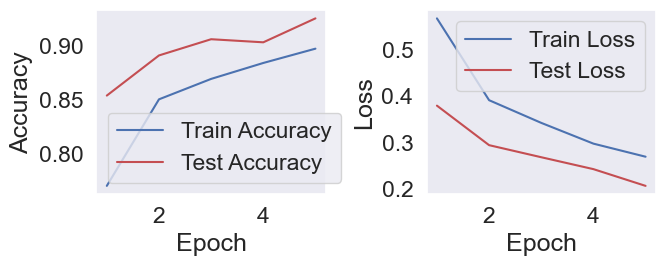

In [9]:
# For Attempt 5 
import matplotlib.pyplot as plt
 
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1,len(acc2)+1)
 
# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
 
axes[0].plot(epochs, acc2,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
 
axes[1].plot(epochs, loss2,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
 
# Adjusting layout for better spacing
plt.tight_layout()
 
# Display the figure
plt.show()

In [10]:
# For Attempt 5 
import numpy as np
predict_x = model.predict(X_test)
predict1 = np.argmax(predict_x, axis = 1)
print(predict1)

44/44 [==============================] - 79s 2s/step
[0 0 0 ... 3 3 3]


In [11]:
# For Attempt 5 
num_classes = 4
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predict1, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.95      0.96      0.96       309
     Class 1       0.95      0.90      0.93       335
     Class 2       0.99      0.98      0.99       399
     Class 3       0.93      0.99      0.96       362

    accuracy                           0.96      1405
   macro avg       0.96      0.96      0.96      1405
weighted avg       0.96      0.96      0.96      1405



In [19]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 240, 240, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 240, 240, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                            

In [17]:
# Attempt 4 
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import cv2


# Parameters
img_size = (240, 240)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
num_classes = 4


# # Preprocess the images
# def preprocess_images(images, target_size=img_size):
#     images_resized = [cv2.resize(np.array(image), target_size) for image in images]
#     images_normalized = np.array(images_resized) / 255.0
#     return images_normalized


# Example: Convert DataFrame to numpy array
X_train = np.array(train_df['image'].tolist())
y_train = train_df['label'].values
X_test = np.array(test_df['image'].tolist())
y_test = test_df['label'].values


# Ensure images have 3 channels
X_train = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) if img.shape[-1] != 3 else img for img in X_train])
X_test = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) if img.shape[-1] != 3 else img for img in X_test])


# # Convert and preprocess images
# X_train_preprocessed = preprocess_images(X_train)
# X_test_preprocessed = preprocess_images(X_test)


# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)


# Load pre-trained EfficientNetB0 with a different input size
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=img_shape)


# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer for 4 classes


# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)


# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False


# Compile the model for multi-class classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping])


# Unfreeze some layers and fine-tune
for layer in base_model.layers[-20:]:
    layer.trainable = True


# Recompile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


# Continue training
history_fine = model.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_test, y_test_encoded))


# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10
332/332 [==============================] - 628s 2s/step - loss: 0.5410 - accuracy: 0.7837 - val_loss: 0.3471 - val_accuracy: 0.8712
Epoch 2/10
332/332 [==============================] - 621s 2s/step - loss: 0.3896 - accuracy: 0.8454 - val_loss: 0.2815 - val_accuracy: 0.9018
Epoch 3/10
332/332 [==============================] - 623s 2s/step - loss: 0.3409 - accuracy: 0.8691 - val_loss: 0.2706 - val_accuracy: 0.8982
Epoch 4/10
332/332 [==============================] - 622s 2s/step - loss: 0.2933 - accuracy: 0.8911 - val_loss: 0.2475 - val_accuracy: 0.9025
Epoch 5/10
332/332 [==============================] - 649s 2s/step - loss: 0.2589 - accuracy: 0.9002 - val_loss: 0.2318 - val_accuracy: 0.9146
Epoch 6/10
332/332 [==============================] - 622s 2s/step - loss: 0.2428 - accuracy: 0.9073 - val_loss: 0.1761 - val_accuracy: 0.9431
Epoch 7/10
332/332 [==============================] - 624s 2s/step - loss: 0.2117 - accuracy: 0.9210 - val_loss: 0.2468 - val_accuracy: 0.9103

KeyboardInterrupt: 

In [13]:
# def convert_image_to_rgb(image):
#     return cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
 
# X_train=X_train.apply(convert_image_to_rgb)
# X_test=X_test.apply(convert_image_to_rgb)

In [14]:
# X_train

In [15]:
# X_test

In [16]:
# y_test

In [21]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# from tensorflow.keras.models import Model
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# import cv2

# # Parameters
# img_size = (240, 240)
# channels = 3
# img_shape = (img_size[0], img_size[1], channels)
# num_classes = 4

# # Preprocess the images
# def preprocess_images(images, target_size=img_size):
#     images_resized = [cv2.resize(np.array(image), target_size) for image in images]
#     images_normalized = np.array(images_resized) / 255.0
#     return images_normalized

# # Example: Convert DataFrame to numpy array
# X_train = np.array(train_df['image'].tolist())
# y_train = train_df['label'].values
# X_test = np.array(test_df['image'].tolist())
# y_test = test_df['label'].values

# # Ensure images have 3 channels
# X_train = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) if img.shape[-1] != 3 else img for img in X_train])
# X_test = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) if img.shape[-1] != 3 else img for img in X_test])

# # Convert and preprocess images
# X_train_preprocessed = preprocess_images(X_train)
# X_test_preprocessed = preprocess_images(X_test)

# # One-hot encode the labels
# y_train_encoded = to_categorical(y_train, num_classes=num_classes)
# y_test_encoded = to_categorical(y_test, num_classes=num_classes)

# # Data augmentation
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Load pre-trained EfficientNetB0 with a different input size
# base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=img_shape)

# # Add custom classification layers
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# predictions = Dense(num_classes, activation='softmax')(x)  # Output layer for 4 classes

# # Create the final model
# model = Model(inputs=base_model.input, outputs=predictions)

# # Freeze the base model layers
# for layer in base_model.layers:
#     layer.trainable = False

# # Compile the model for multi-class classification
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Callbacks for early stopping and model checkpointing
# callbacks = [
#     EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
#     ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
# ]

# # Train the model
# history = model.fit(datagen.flow(X_train_preprocessed, y_train_encoded, batch_size=32),
#                     epochs=50,
#                     validation_data=(X_test_preprocessed, y_test_encoded),
#                     callbacks=callbacks)

# # Unfreeze some layers and fine-tune
# for layer in base_model.layers[-20:]:
#     layer.trainable = True

# # Recompile the model with a lower learning rate
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# # Continue training with fine-tuning
# history_fine = model.fit(datagen.flow(X_train_preprocessed, y_train_encoded, batch_size=32),
#                          epochs=50,
#                          validation_data=(X_test_preprocessed, y_test_encoded),
#                          callbacks=callbacks)

# # Evaluate the model on the test dataset
# test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded)
# print(f'Test accuracy: {test_accuracy * 100:.2f}%')


MemoryError: Unable to allocate 6.84 GiB for an array with shape (10618, 240, 240, 3) and data type float32

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# from tensorflow.keras.models import Model
# from tensorflow.keras.utils import to_categorical
# import cv2


# # Parameters
# img_size = (240, 240)
# channels = 3
# img_shape = (img_size[0], img_size[1], channels)
# num_classes = 4

# # Preprocess the images
# def preprocess_images(images, target_size=img_size):
#     images_resized = [cv2.resize(image, target_size) for image in images]
#     images_rgb = [cv2.cvtColor(image, cv2.COLOR_GRAY2RGB) if image.shape[-1] == 1 else image for image in images_resized]
#     images_normalized = np.array(images_rgb) / 255.0
#     return images_normalized

# # Convert and preprocess images
# X_train_preprocessed = preprocess_images(X_train)
# X_test_preprocessed = preprocess_images(X_test)

# # One-hot encode the labels
# y_train_encoded = to_categorical(y_train, num_classes=num_classes)
# y_test_encoded = to_categorical(y_test, num_classes=num_classes)

# # Load pre-trained EfficientNetB0 with a different input size
# base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=img_shape)

# # Add custom classification layers
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# predictions = Dense(num_classes, activation='softmax')(x)  # Output layer for 4 classes

# # Create the final model
# model = Model(inputs=base_model.input, outputs=predictions)

# # Freeze the base model layers
# for layer in base_model.layers:
#     layer.trainable = False

# # Compile the model for multi-class classification
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train_preprocessed, y_train_encoded, epochs=10, validation_data=(X_test_preprocessed, y_test_encoded))

# # Unfreeze some layers and fine-tune
# for layer in base_model.layers[-20:]:
#     layer.trainable = True

# # Recompile the model with a lower learning rate
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# # Continue training
# history_fine = model.fit(X_train_preprocessed, y_train_encoded, epochs=10, validation_data=(X_test_preprocessed, y_test_encoded))

# # Evaluate the model on the test dataset
# test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded)
# print(f'Test accuracy: {test_accuracy * 100:.2f}%')

MemoryError: Unable to allocate 6.84 GiB for an array with shape (10618, 240, 240, 3) and data type float32

In [1]:
print("Hello World")

Hello World
